# Introduction to first machine learning method 
## Linear Regression
Welcome to your first ML Method, in today's notebook we will see the linear regression.
Some people might think a linear regression does not help or it is too basic, but it is one of the best methods out there.


## Training through the Normal Equation 

If you recall, every training algorithm for almost every different type of supervised agent needs to be trained accompanied with a teacher - that is, a cost function. For neural networks, the first cost function to be utilised, was the __Mean Squared Error__, due to their great statistical and mathematical properties. However, more cost functions are now utilised depending on the __observed moments of data characteristics__ during the EDA to enhance their accuracy of prediction. 

Taking the __MSE__ as out teaching cost function depends on the training parameters in the following manner: $J(w)$. Then our error will just take the following shape:

$$ J(w) = \sum_{n=0}^{N-1}{(y_n - w^TX_n)}^2$$

If we want to minimise this cost function with respect to the parameters then it will just lead to the following result in vector form:

$$ J(w) = (y - Xw)^T(y - Xw)$$

$$ y y^T - y^TXw - (Xw)^Ty + (Xw)^TXw$$

Doing a bit of algebra:

$$ J(w) = y y^T - 2y^TXw + w^TX^TXw$$

Finding the maxima and minima:

$$ \frac{\delta J}{\delta w} = 0 $$ gets:

$$ - 2y^TX + 2X^TXw^T = 0$$

$$ X^TXw^T = y^TX$$

$$ (X^TX)^{-1}X^TXw^T = (X^TX)^{-1}y^TX$$

Leading to the final training closed-form result: 

$$ w = (X^TX)^{-1}y^TX$$

The previous equation is commonly known in the field of mathematics as __the Normal Equation__


# Challenge


## Implementation of the Normal Equation

As a final task for this notebook, imagine we have got the following data sampled from a random bivariate distribution coming from the measurement errors for two different types of motor speed sensors. Your goal is trying to characterise the error behaviour of the sensor:

The generating functions are found below:

```python 

X1,y1 = np.random.multivariate_normal([0,2], [[0.5,0],[0,.5]], 500).T
X2,y2 = np.random.multivariate_normal([1,-1], [[1,-0.9],[-0.9,1]], 500).T

```

### Tasks:

- __Plot__ the values of X1 and X2 with their respective y1 and y2 using different colours for each class.

- Try to __guess using a normal line equation__ $y = m X + b$, for the best value of m and b that __predicts each regression variable X1 and X2__.

- __Plot the different lines on top of the X1 and X2 vs y1 and y2 distibutons__! Calculate the MSE using the python MSE function between for each value of X and the residual plot

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X1,y1 = np.random.multivariate_normal([0,2], [[0.5,0],[0,.5]], 500).T
X2,y2 = np.random.multivariate_normal([1,-1], [[1,-0.9],[-0.9,1]], 500).T

### plotting X1, y1

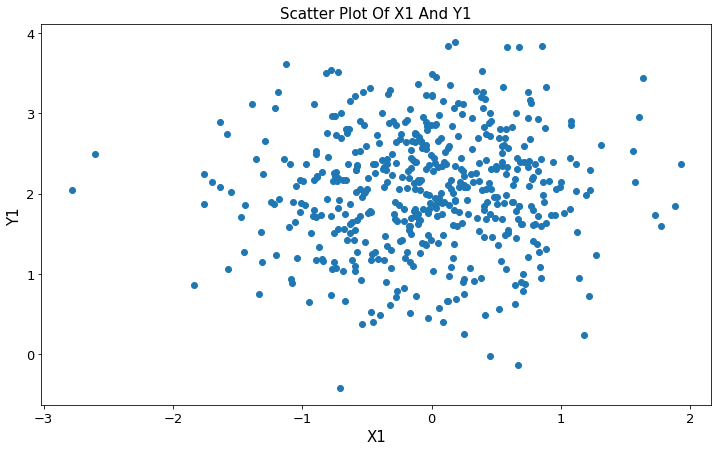

In [3]:
plt.figure(figsize=(12,7))
plt.scatter(X1, y1)
plt.title("Scatter plot of X1 and Y1".title(), fontsize=15)
plt.xlabel("X1", fontsize=15)
plt.ylabel("Y1", fontsize=15)
plt.tick_params(axis='both', labelsize=13)
plt.show()

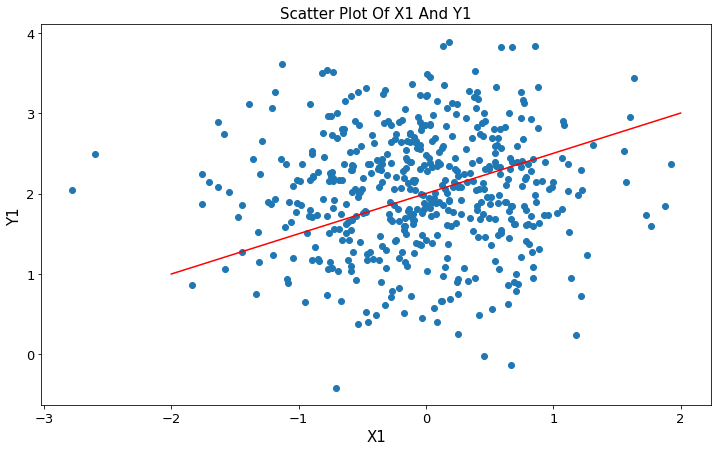

In [4]:
x = np.linspace(-2,2,100)
y_1 = x/2+2
plt.figure(figsize=(12,7))
plt.plot(x, y_1, color="r")
plt.scatter(X1, y1)
plt.title("Scatter plot of X1 and Y1".title(), fontsize=15)
plt.xlabel("X1", fontsize=15)
plt.ylabel("Y1", fontsize=15)
plt.tick_params(axis='both', labelsize=13)
plt.show()

### plotting X2, y2

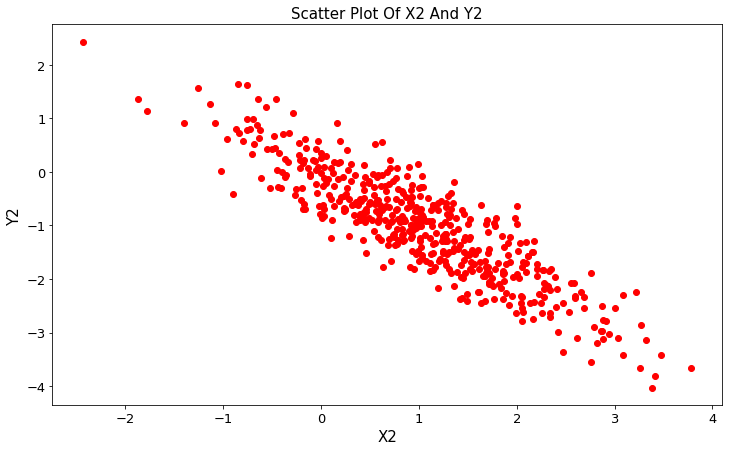

In [5]:
plt.figure(figsize=(12,7))
plt.scatter(X2, y2, color="red")
plt.title("Scatter plot of X2 and Y2".title(), fontsize=15)
plt.xlabel("X2", fontsize=15)
plt.ylabel("Y2", fontsize=15)
plt.tick_params(axis='both', labelsize=13)
plt.show()

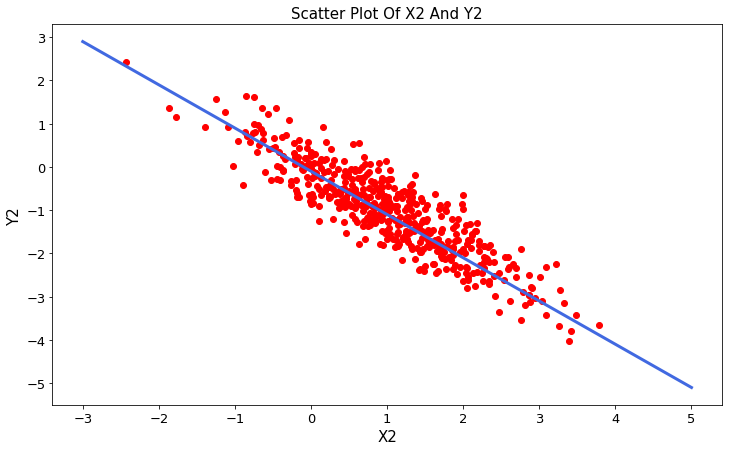

In [6]:
x2 = np.linspace(-3,5,100)
y_2 = -x2 -.1
plt.figure(figsize=(12,7))
plt.plot(x2,y_2, color="royalblue", linewidth=3)
plt.scatter(X2, y2, color="red")
plt.title("Scatter plot of X2 and Y2".title(), fontsize=15)
plt.xlabel("X2", fontsize=15)
plt.ylabel("Y2", fontsize=15)
plt.tick_params(axis='both', labelsize=13)
plt.show()

### plotting X1, y1 vs X2, y2

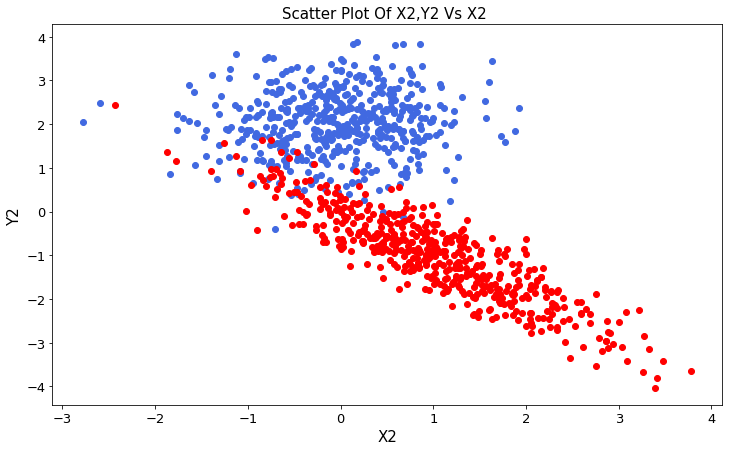

In [7]:
plt.figure(figsize=(12,7))
plt.scatter(X1, y1, color="royalblue")
plt.scatter(X2, y2, color="red")
plt.title("Scatter plot of X2,Y2 vs X2 ".title(), fontsize=15)
plt.xlabel("X2", fontsize=15)
plt.ylabel("Y2", fontsize=15)
plt.tick_params(axis='both', labelsize=13)
plt.show()

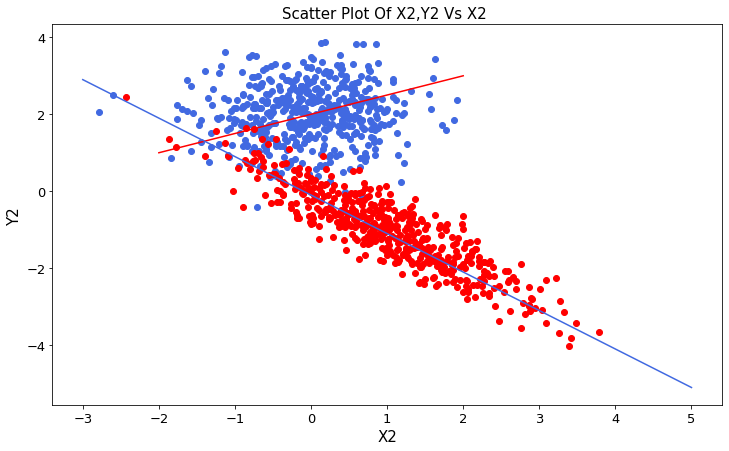

In [8]:
plt.figure(figsize=(12,7))
plt.plot(x, y_1, color="red")
plt.plot(x2, y_2, color="royalblue")
plt.scatter(X1, y1, color="royalblue")
plt.scatter(X2, y2, color="red")
plt.title("Scatter plot of X2,Y2 vs X2 ".title(), fontsize=15)
plt.xlabel("X2", fontsize=15)
plt.ylabel("Y2", fontsize=15)
plt.tick_params(axis='both', labelsize=13)
plt.show()

In [9]:
#plt.scatter(X1,y1)
#plt.scatter(X2,y2,c='r')
#plt.show()

In [35]:
class NormalEquation():
    """
    """
    def __init__(self):
        self.w = 0
        
    def fit(self, X, y):
        """
        """
        
        X = np.c_[X, np.ones(X.shape[0])]
        t = np.linalg.pinv(X.T.dot(X))
        t2 = y.T.dot(X)
        self.w = t.dot(t2)
        
        return self.w
    
    def MSE(self, y_real, y_predict): 
        
        mse = np.subtract(y_real, y_predict)
        mse = np.square(mse)
        return mse.mean()
        
    def plot(self, X, y):
        #pass
        points = np.linspace(-2,5,50)
        plt.figure(figsize=(12,7))
        plt.scatter(X, y)
        plt.plot(points, self.w[0] * points  + self.w[1], c="red")
      
    def predict(self, dato):
        y_predict = self.w[0] * dato + self.w[1]
        
        return y_predict
    

In [36]:
test = NormalEquation()

In [37]:
test.fit(X2, y2)

array([-0.92706598, -0.08017012])

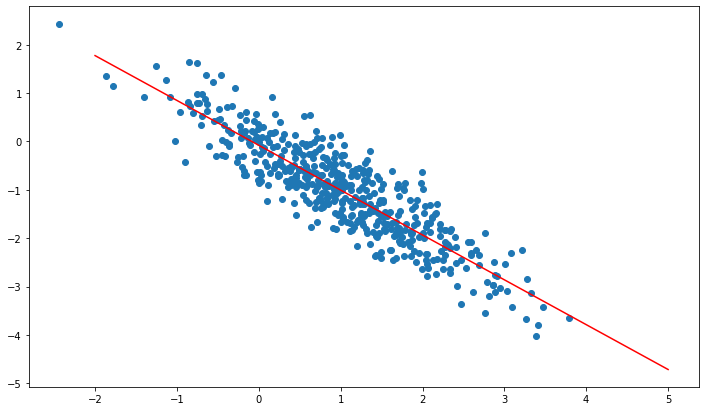

In [38]:
test.plot(X2, y2)